<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/ML-2025a/blob/main/Week_02/Week_02_Lab_Linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 02 Lab: Linear models
This notebook was developed using methodologies suggested by ChatGPT (OpenAI, 2025)

# Intro

In this lab, we will learn how **linear models** work by starting from scratch.

- First, we will use **NumPy** to manually implement gradient descent for **linear regression**.
- Then, we will progressively use **PyTorch** and later **PyTorch Lightning** to make our life easier.
- Finally, we will extend from **linear regression** to **logistic regression** for classification.

---


# Block 1: Gradient descent implemented manually

## Step 1: Generate Date

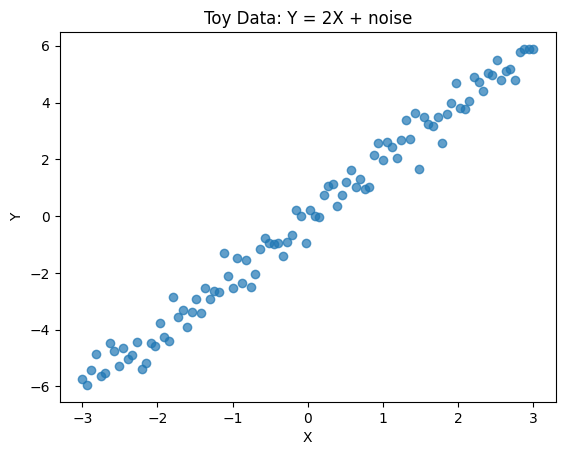

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate toy data: Y = 2*X + noise
X = np.linspace(-3, 3, 100)
noise = np.random.randn(100) * 0.5
Y = 2 * X + noise

# Visualize data
plt.scatter(X, Y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Toy Data: Y = 2X + noise")
plt.show()

## Step 2, 3: Initialize Model Parameters and the model itself

In [12]:
# Initialize parameters randomly
w = np.random.randn()
b = np.random.randn()

print("Initial parameters: w =", w, "b =", b)


Initial parameters: w = -1.4153707420504142 b = -0.42064532276535904


In [13]:
def predict(x, w, b):
    """Linear model prediction: y = wx + b"""
    return w * x + b

# Test prediction
print("Prediction for x=1.0:", predict(1.0, w, b))


Prediction for x=1.0: -1.8360160648157733


## Step 4: Define Objective (MSE)

In [14]:
def mse_loss(y_true, y_pred):
    """Mean Squared Error"""
    # TODO: implement formula: mean((y_true - y_pred)**2)
    loss = None  # add your code here
    return loss

# Test loss function
y_pred_test = predict(X, w, b)
print("Initial loss:", mse_loss(Y, y_pred_test))


Initial loss: None


## Install and import libraries

In [ ]:
!pip install gensim nltk matplotlib

import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# For pretrained vectors
import gensim.downloader as api

nltk.download("punkt")       # basic sentence tokenizer
nltk.download("punkt_tab")   # (newer NLTK versions require this too)

## PART 1: Tiny Toy Corpus

In [ ]:
print("=== PART 1: Tiny toy corpus ===")

# 1. Define a tiny "made-up" dataset
toy_sentences = [
    ["king", "queen", "man", "woman"],
    ["robot", "computer", "machine", "automation"],
    ["cat", "dog", "animal", "pet"],
    ["car", "bus", "train", "transport"],
    ["doctor", "nurse", "hospital", "medicine"],
    ["teacher", "student", "school", "education"],
    ["apple", "banana", "fruit", "food"]
]

# 2. Train Word2Vec on this toy corpus
toy_model = Word2Vec(toy_sentences, vector_size=20, window=2, min_count=1, sg=1, epochs=500)

# 3. Show some vectors
print("\nVector for 'king':\n", toy_model.wv["king"], "\n")

# 4. Check similarities
print("Similarity king-queen:", toy_model.wv.similarity("king", "queen"))
print("Similarity king-robot:", toy_model.wv.similarity("king", "robot"))

# 5. Analogy test
print("\nAnalogy: king - man + woman ≈ ?")
print(toy_model.wv.most_similar(positive=["king","woman"], negative=["man"], topn=3))

# 6. Visualization of toy embeddings
words = list(toy_model.wv.key_to_index)
X = toy_model.wv[words]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Toy Word Embeddings (PCA projection)")
plt.show()

## PART 2: Real Corpus (Shakespeare Macbeth)

In [ ]:
print("\n=== PART 2: Shakespeare Macbeth ===")

import nltk
nltk.download("gutenberg")
nltk.download("punkt")
nltk.download("punkt_tab")

from nltk.corpus import gutenberg

# Download NLTK resources
nltk.download("gutenberg")
nltk.download("punkt")

# Load Hamlet
raw_text = gutenberg.raw("shakespeare-hamlet.txt")

# Preprocess: lowercase and remove punctuation
sentences = []
for sent in sent_tokenize(raw_text):
    tokens = [w.lower() for w in word_tokenize(sent) if w.isalpha()]
    if tokens:
        sentences.append(tokens)

# Train Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1, epochs=20)

# Vocabulary size
print("Vocabulary size:", len(model.wv))

# Similarities
def safe_sim(word1, word2):
    try:
        return model.wv.similarity(word1, word2)
    except KeyError:
        return f"{word1} or {word2} not in vocab"

print("\nSimilarity king-queen:", safe_sim("king","queen"))
print("Similarity king-man:", safe_sim("king","man"))
print("Similarity queen-woman:", safe_sim("queen","woman"))

# Analogy test
try:
    result = model.wv.most_similar(positive=["king","woman"], negative=["man"], topn=3)
    print("\nAnalogy: king - man + woman ≈", result)
except KeyError as e:
    print("Analogy failed:", e)

# Visualization of selected words
target_words = ["king","queen","man","woman","hamlet","claudius","ophelia","polonius"]
words_in_vocab = [w for w in target_words if w in model.wv]
X = model.wv[words_in_vocab]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words_in_vocab):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Hamlet Word Embeddings (PCA projection)")
plt.show()

## PART 3: Pretrained Embeddings

In [ ]:
print("\n=== PART 3: Pretrained GloVe vectors ===")

# Load pretrained GloVe (50-dim, trained on Wikipedia + Gigaword)
glove_model = api.load("glove-wiki-gigaword-50")

# Real semantic similarities
print("\nSimilarity king-queen:", glove_model.similarity("king", "queen"))
print("Similarity king-robot:", glove_model.similarity("king", "robot"))

# Analogy test
print("\nAnalogy: king - man + woman ≈ ?")
print(glove_model.most_similar(positive=["king","woman"], negative=["man"], topn=5))

# Visualization of selected embeddings
target_words = ["king","queen","man","woman","prince","princess","doctor","nurse","robot","machine"]
X = glove_model[target_words]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(target_words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Pretrained GloVe Word Embeddings (PCA projection)")
plt.show()


## STUDENT ACTIVITIES

In [ ]:
print("\n=== Student Exercises ===")
print("""
1. Modify the toy corpus in PART 1 by adding your own sentences (e.g., robotics, vision, AI).
   - Observe how adding new data changes similarities and analogies.

2. Change training parameters:
   - Try vector_size=10 vs 100, window=2 vs 10, sg=0 (CBOW) vs sg=1 (Skip-gram).
   - Compare results.

3. In PART 2, explore Shakespeare embeddings:
   - Check similarities between words like "king", "death", "love".
   - Visualize different sets of words.

4. In PART 3, query pretrained embeddings:
   - Try analogies: "paris - france + italy ≈ ?", "camera - image + sound ≈ ?".
   - Pick robotics/CV words and test them.

Discussion:
- Why do toy embeddings fail? (data scale)
- Why do pretrained embeddings capture meaning better?
- How do LLMs build on embeddings? (contextual, dynamic representations)
""")
